<a href="https://colab.research.google.com/github/feliciapedwards/TensorFlow-with-Laurence-Moroney/blob/master/Course2Wk1%262_CatsVSDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here in this workbook, we will:

1. Explore the Example Data of Cats and Dogs
2. Build and Train a Neural Network to recognize the difference between the two
3. Evaluate the Training and Validation accuracy

Let's download the images

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2019-12-27 20:06:02--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  32.6MB/s    in 2.0s    

2019-12-27 20:06:04 (32.6 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Let's unzip the files

In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

Again, our images are labeled somewhat indirectly, as they're labeled automatically labeled the name of their corresponding subdirectory. 

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Lets look at the file names

In [4]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.57.jpg', 'cat.493.jpg', 'cat.915.jpg', 'cat.417.jpg', 'cat.88.jpg', 'cat.955.jpg', 'cat.596.jpg', 'cat.991.jpg', 'cat.143.jpg', 'cat.883.jpg']
['dog.377.jpg', 'dog.871.jpg', 'dog.175.jpg', 'dog.27.jpg', 'dog.376.jpg', 'dog.463.jpg', 'dog.66.jpg', 'dog.837.jpg', 'dog.751.jpg', 'dog.663.jpg']


Let's look at the number of images

In [5]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


Let's look at some images

In [0]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

In [0]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

One huge difference between this dataset and the Horses VS Humans dataset, is that these images come in all shapes and sizes!

Let's build our model.
Since all the images are different shapes and sizes, we need to standardize them. We will resize them all to be 150x150 .

In [0]:
import tensorflow as tf

Again, since this a binary classification problem, we will use sigmoid.

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])

Our data generators will read the pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of 20 images of size 150x150 and their labels (binary).

We need to normalized our data for it to be processed. We will accomplish this using keras.preprocessing.image.ImageDataGenerator to rescale this parameter so that the pixel values will be in this range: [0, 1].

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize images
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


# Flow training images
train_generator = train_datagen.flow_from_directory(
      train_dir, # This is the source directory for training images
      batch_size=20, # Batch size 20
      class_mode='binary', # Since we use binary_crossentropy loss, we need binary labels
      target_size=(150, 150)) # All images will be resized to 150x150     

# Flow validation images
validation_generator =  test_datagen.flow_from_directory(
      validation_dir,
      batch_size=20,
      class_mode  = 'binary',
      target_size = (150, 150))

# Test our model
history = model.fit_generator(
      train_generator,
      validation_data=validation_generator,
      steps_per_epoch=100, # 2000 images = batch_size * steps
      epochs=15,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/15
100/100 - 83s - loss: 0.7845 - acc: 0.5465 - val_loss: 0.6605 - val_acc: 0.6140
Epoch 2/15
100/100 - 82s - loss: 0.6308 - acc: 0.6460 - val_loss: 0.5784 - val_acc: 0.7070
Epoch 3/15
100/100 - 83s - loss: 0.5470 - acc: 0.7335 - val_loss: 0.5849 - val_acc: 0.6850
Epoch 4/15
100/100 - 83s - loss: 0.4370 - acc: 0.7925 - val_loss: 0.5877 - val_acc: 0.7060
Epoch 5/15
100/100 - 83s - loss: 0.3573 - acc: 0.8420 - val_loss: 0.6436 - val_acc: 0.7060
Epoch 6/15
100/100 - 83s - loss: 0.2689 - acc: 0.8930 - val_loss: 0.7312 - val_acc: 0.6930
Epoch 7/15
100/100 - 83s - loss: 0.1814 - acc: 0.9250 - val_loss: 0.9059 - val_acc: 0.7060
Epoch 8/15
100/100 - 83s - loss: 0.1032 - acc: 0.9635 - val_loss: 1.1705 - val_acc: 0.6940
Epoch 9/15
100/100 - 83s - loss: 0.1062 - acc: 0.9665 - val_loss: 1.1984 - val_acc: 0.7140
Epoch 10/15
100/100 - 83s - loss: 0.0583 - acc: 0.9810 - val_loss: 1.3872 - val_acc: 0.7200
Epoch

Let's run a prediction

In [14]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving pug-801826_1920.jpg to pug-801826_1920.jpg
[0.]
pug-801826_1920.jpg is a cat


Let's see how our images are processed

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


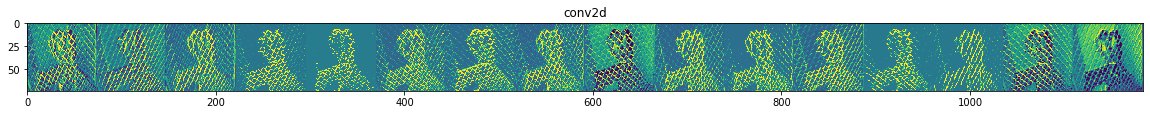

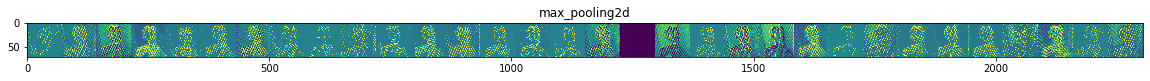

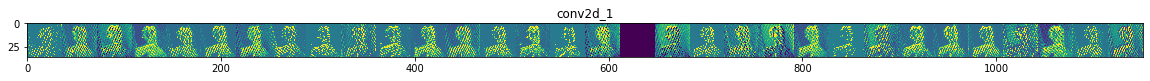

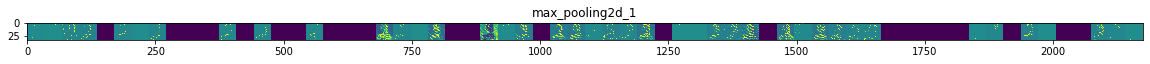

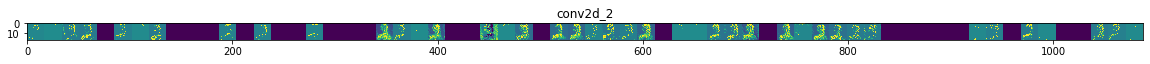

In [15]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Normalize
x /= 255.0

# Let's run our image through our network
successive_feature_maps = visualization_model.predict(x)

# Layer Names
layer_names = [layer.name for layer in model.layers]

# Display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    # For the conv / maxpool layers
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Display images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the features
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    # Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Let's look at the training/validation accuracy and loss during training:

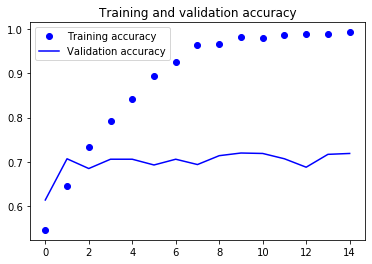

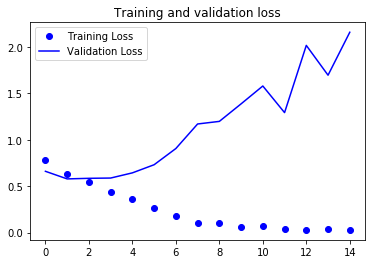

In [17]:
import matplotlib.pyplot as plt

# Retrieve a list of results on training and test data
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

 # Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Looks like we're overfitting since our training accuracy gets close to 100% while our validation accuracy doesn't improve more than 70% and our validation loss reaches its minimum after only five epochs.Because we have such a small number of training examples (2000), overfitting should be our primary concern. Overfitting happens when a model doesn't get enough exposure to a wide variety of examples. 

Let's try to reduce our overfitting by augmenting the images. 

In [0]:
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rotation_range=40, # rotates image randomly between 0 and 40 degrees
      width_shift_range=0.2, # moves image within it's frame, it specifies proportion of image size how much the subject should be moved
      height_shift_range=0.2, # moves image within it's frame, it specifies proportion of image size how much the subject should be moved
      shear_range=0.2, # shearing skews the image along the x-axes
      zoom_range=0.2, # can zoom in on an image
      horizontal_flip=True, # flips image around the y axes
      fill_mode='nearest') # fills in pixels that might have been lost

In [21]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

# ImageGenerator updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40, # rotates image randomly between 0 and 40 degrees
      width_shift_range=0.2, # moves image within it's frame, it specifies proportion of image size how much the subject should be moved
      height_shift_range=0.2, # moves image within it's frame, it specifies proportion of image size how much the subject should be moved
      shear_range=0.2, # shearing skews the image along the x-axes
      zoom_range=0.2, # can zoom in on an image
      horizontal_flip=True, # flips image around the y axes
      fill_mode='nearest') # fills in pixels that might have been lost

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

--2019-12-27 21:22:51--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   104MB/s    in 0.6s    

2019-12-27 21:22:51 (104 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
100/100 - 148s - loss: 0.6969 - acc: 0.5045 - val_loss: 0.6840 - val_acc: 0.5210
Epoch 2/10
100/100 - 145s - loss: 0.6836 - acc: 0.5485 - val_loss: 0.6682 - val_acc: 0.5360
Epoch 3/10
100/100 - 145s - loss: 0.6728 - acc: 0.5785 - val_loss: 0.6566 - val_acc: 0.5810
Epoch 4/10
100/100 - 145s - loss: 0

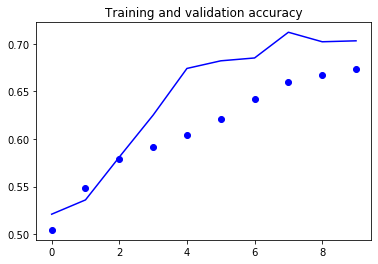

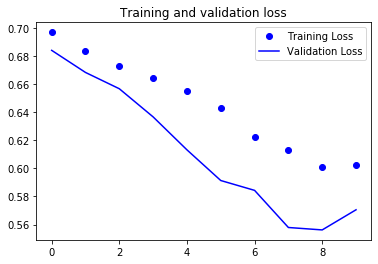

In [22]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Its looking better! I would try running the model for more epochs, but I'm impatient.